# Tratamiento de datos 

Se utilizará la división de datos de la forma:
<ol>
    <li> Entrenamiento 60% </li>
    <li> Validación 20% </li>
    <li> Prueba 20%</li>
        </ol>

(42000, 784) (14000, 784) (14000, 784)
(42000,) (14000,) (14000,)


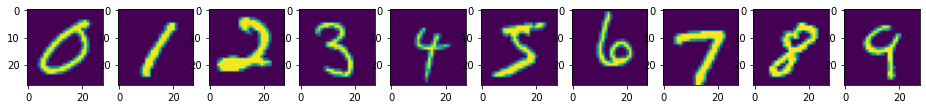

In [116]:
import  tensorflow as tf

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import numpy as np
from sklearn.model_selection import train_test_split#60,20,20
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
(X,Y),(X1,Y1)=tf.keras.datasets.mnist.load_data()

plt.figure(figsize=(16,4))

plt.subplot(1,10,1)
plt.imshow(X[4415,:,:])
plt.subplot(1,10,2)
plt.imshow(X[3,:,:])
plt.subplot(1,10,3)
plt.imshow(X[1010,:,:])
plt.subplot(1,10,4)
plt.imshow(X[12344,:,:])
plt.subplot(1,10,5)
plt.imshow(X[412,:,:])
plt.subplot(1,10,6)
plt.imshow(X[0,:,:])
plt.subplot(1,10,7)
plt.imshow(X[1802,:,:])
plt.subplot(1,10,8)
plt.imshow(X[4545,:,:])
plt.subplot(1,10,9)
plt.imshow(X[415,:,:])
plt.subplot(1,10,10)
plt.imshow(X[344,:,:])
X=X.reshape(len(X),X.shape[1]*X.shape[2])
#Y=Y.reshape(len(Y),Y.shape[1]*Y.shape[2])
X1=X1.reshape(len(X1),X1.shape[1]*X1.shape[2])
#Y1=Y1.reshape(len(Y1),Y1.shape[1]*Y1.shape[2])
X=np.vstack((X,X1))
Y=np.hstack((Y,Y1))


x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.75)
print( x_train.shape, x_val.shape, x_test.shape)
print( y_train.shape, y_val.shape, y_test.shape)



# Normalización de los datos

Se realiza una división sobre el valor máximo de los datos 

$$dato_i:=\frac{dato_i}{max(datos)}$$

Se obtendran datos en el intervalo $[0,1]$

In [117]:
x_train_norm=(x_train/x_train.max())
x_val_norm=(x_val/x_val.max())
x_test_norm=(x_test/x_test.max())

Esto solo se aplicará para los valores de la variable independiente.

Para los valores de $y$ se hará la configuración de ONE HOT

Para realizar esto, se debe observar el rango de valores en los que se tienen los valores de $y$. En este caso se tiene un intervalo de $[0,9]$ lo que implican 10 posibilidades de respuesta. Entonces el $one hot$ será de 

In [118]:
from tensorflow.keras.utils import to_categorical
#print(y_train.min(),y_train.max())
print(y_train[8760])
y_train_oh=to_categorical(y_train,y_train.max()+1) ## porque se incluye el 0
y_test_oh=to_categorical(y_test,y_test.max()+1)
y_val_oh=to_categorical(y_val,y_val.max()+1)
print(y_train_oh[8760])


3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Propuesta de red neuronal.
Uso de neurona perceptron multicapa

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model=Sequential()
model.add(Dense(250,input_shape=(784,),activation='sigmoid'))
#model.add(Dense(7,activation='sigmoid'))
model.add(Dense(150,activation='sigmoid'))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_46 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_47 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1010      
Total params: 250,010
Trainable params: 250,010
Non-trainable params: 0
_________________________________________________________________


# Caracteristicas de la red

In [120]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

# Aprendizaje de la red

In [121]:
import time


t1=time.time()
model.fit(x_train_norm, y_train_oh, validation_data = (x_val_norm, y_val_oh), epochs = 50 , batch_size = 64, verbose = 1)
t2=time.time()
print('tiempo de entrenamiento y validación',t2-t1)

Epoch 1/50
657/657 [==============================] - 1s 2ms/step - loss: 0.6659 - accuracy: 0.8201 - val_loss: 0.2883 - val_accuracy: 0.9193
Epoch 2/50
657/657 [==============================] - 1s 1ms/step - loss: 0.2209 - accuracy: 0.9359 - val_loss: 0.2069 - val_accuracy: 0.9407
Epoch 3/50
657/657 [==============================] - 1s 1ms/step - loss: 0.1570 - accuracy: 0.9532 - val_loss: 0.1496 - val_accuracy: 0.9554
Epoch 4/50
657/657 [==============================] - 1s 1ms/step - loss: 0.1181 - accuracy: 0.9655 - val_loss: 0.1297 - val_accuracy: 0.9615
Epoch 5/50
657/657 [==============================] - 1s 1ms/step - loss: 0.0930 - accuracy: 0.9727 - val_loss: 0.1126 - val_accuracy: 0.9661
Epoch 6/50
657/657 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9780 - val_loss: 0.1070 - val_accuracy: 0.9679
Epoch 7/50
657/657 [==============================] - 1s 1ms/step - loss: 0.0602 - accuracy: 0.9822 - val_loss: 0.1012 - val_accuracy: 0.9707
Epoch 

In [122]:
pred=model.predict(x_test_norm)
#print(pred)
pred = np.argmax(pred, axis = 1) 
#print(pred)
#print(pred.shape)
label = np.argmax(y_test_oh,axis = 1)

exactitud_test=0
for a in range(len(pred)):
    if pred[a]==y_test[a]:
        exactitud_test+=1
print('exactitud de la prueba= ',100*exactitud_test/len(pred),'%')


pred_train=model.predict(x_train_norm)
#print(pred_train)
pred_train = np.argmax(pred_train, axis = 1) 
#print(pred_train)
#print(pred_train.shape)
label_train = np.argmax(y_train_oh,axis = 1)
exactitud_train=0
for a in range(len(pred_train)):
    if pred_train[a]==y_train[a]:
        exactitud_train+=1
print('exactitud del entrenamiento= ',100*exactitud_train/len(pred_train),'%')


pred_val=model.predict(x_val_norm)
#print(pred_train)
pred_val = np.argmax(pred_val, axis = 1) 
#print(pred_val)
#print(pred_val.shape)
label_val = np.argmax(y_val_oh,axis = 1)
exactitud_val=0
for a in range(len(pred_val)):
    if pred_val[a]==y_val[a]:
        exactitud_val+=1
print('exactitud de la validación= ',100*exactitud_val/len(pred_val),'%')


exactitud de la prueba=  98.18571428571428 %
exactitud del entrenamiento=  100.0 %
exactitud de la validación=  97.98571428571428 %


Caracteristicas
•	Estructura
•	Optimizador
•	Tasa de aprendizaje
•	Exactitud final entrenamiento
•	Exactitud final validación
•	Exactitud final test
•	Épocas 
•	Batch
•	Tiempo de entrenamiento




¿Con el batch se debe de dividir el 60 20 20?